# Assignment 1

*Name: Kevin (Yuxuan) Han*

*NetID: yxh204*

---

In [1]:
import os
import numpy as np
import pylab as plt
import pandas as pd
import geopandas as gpd
from scipy import stats
import statsmodels.formula.api as smf
%matplotlib inline

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

In [2]:
def getNYCMapPLUTO(borough):
    
    print ("Downloading", borough)
    if not os.path.exists(os.getenv("PUIDATA") + "/" + borough + "_mappluto_16v1"):
        if os.path.exists(borough + "_mappluto_16v1"):
            shutil.move(borough + "_mappluto_16v1", os.getenv("PUIDATA"))
        else:
            if not os.path.exists(os.getenv("PUIDATA") + "/" + borough + "_mappluto_16v1"):
                if not os.path.exists(borough + "_mappluto_16v1.zip"):
                    os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/" + \
                              borough + "_mappluto_16v1.zip")
                os.system("mv " + borough + "_mappluto_16v1.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + borough + "_mappluto_16v1.zip")

            print("File in place, you can continue.")
            
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + borough + "_mappluto_16v1.zip"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

---

### Reading Data

In [3]:
nrg = pd.read_csv("https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD")

In [4]:
getNYCMapPLUTO("mn")
bsize = gpd.read_file("MNMapPLUTO.shp")

File in place, you can continue.


#### `nrg`

In [5]:
nrg.shape

(16170, 25)

In [6]:
nrg.columns

Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [7]:
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


#### `bsize`

In [8]:
bsize.shape

(42697, 90)

In [9]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [10]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


---

### Data Cleaning

In [11]:
nrg = nrg[["NYC Borough, Block, and Lot (BBL)", "Zip Code",
          "DOF Property Floor Area (Buildngs and Parking)(ft2)",
          "DOF Number of Buildings", "Site EUI(kBtu/ft2)",
          "Reported Property Floor Area (Building(s)) (ft²)"]]

In [12]:
bsize = bsize[["BBL","UnitsRes", "UnitsTotal"]]

In [13]:
bsize[["UnitsRes", "UnitsTotal"]].head()

,UnitsRes,UnitsTotal
0,16,18
1,50,50
2,10,10
3,29,32
4,26,26


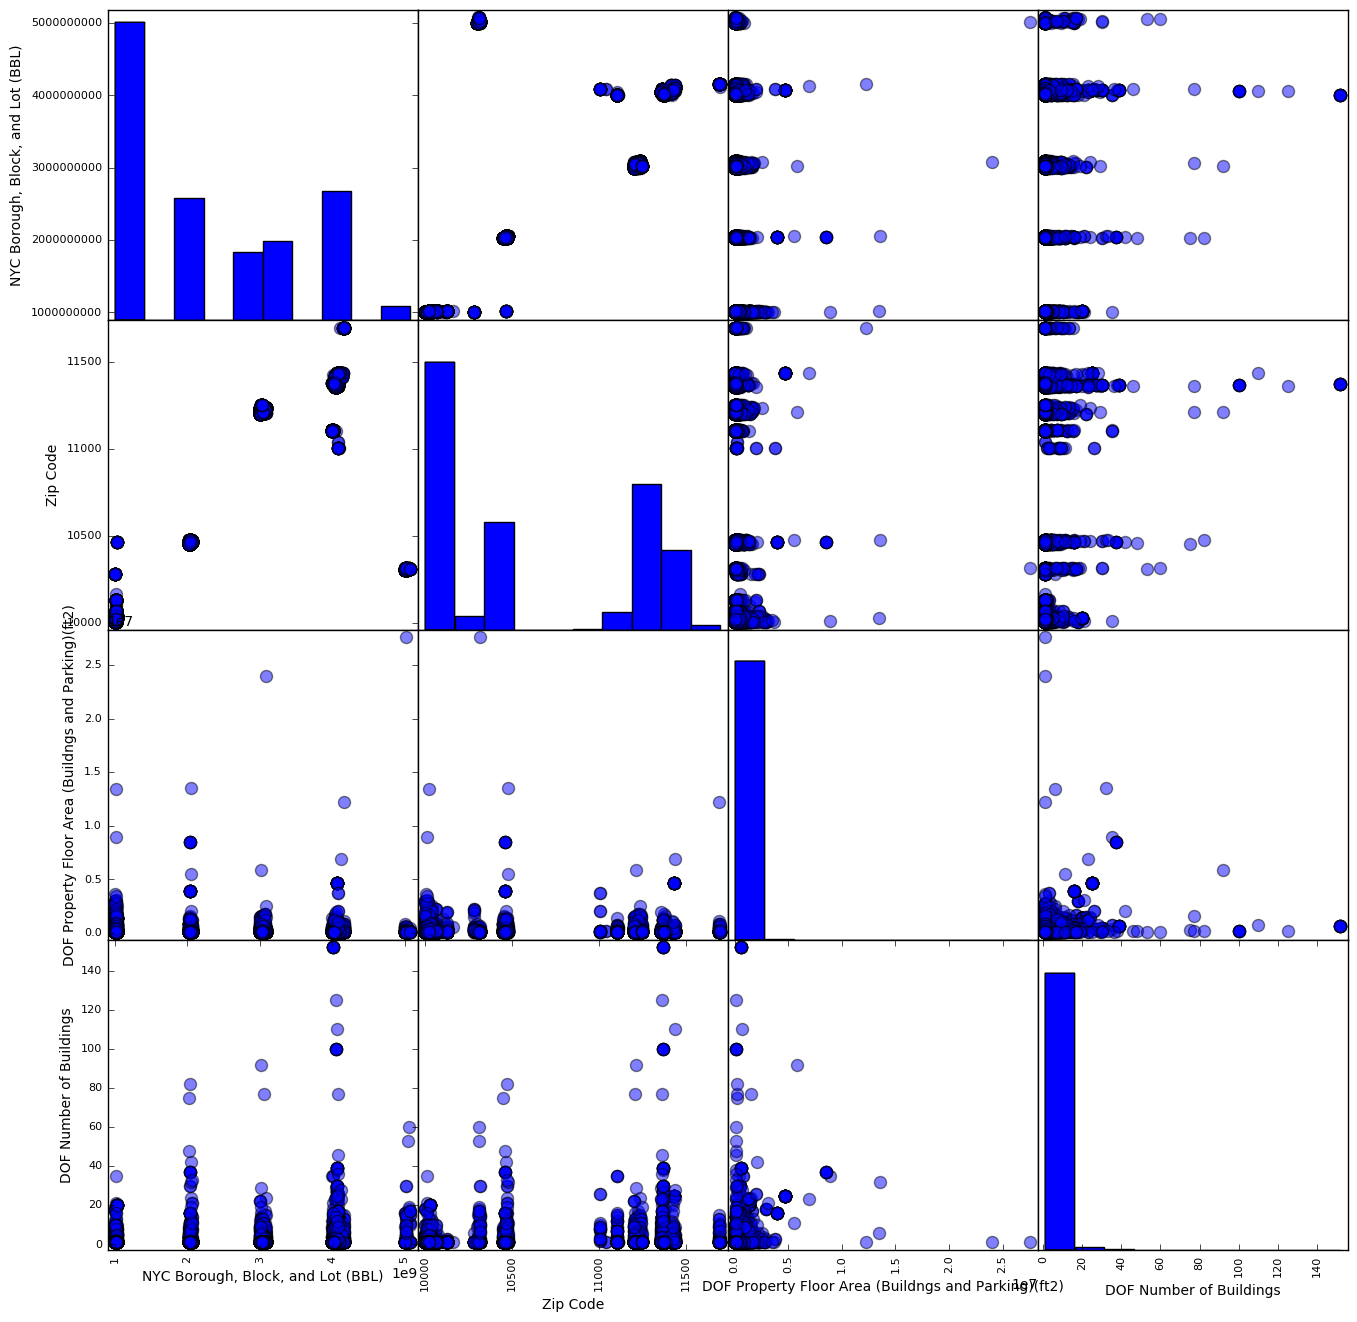

In [14]:
#try make a scatter plot of nrg. Few columns will plot
Axes = pd.scatter_matrix(nrg, s=300, figsize=(16, 16))

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 8) for item in Axes.ravel()];
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 8) for item in Axes.ravel()];
[plt.setp(item.yaxis.get_label(), 'size', 10) for item in Axes.ravel()];
[plt.setp(item.xaxis.get_label(), 'size', 10) for item in Axes.ravel()];

<center>*Figure 1: Scatter Matrix of All Numerical Values in the Files.*</center>

In [15]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [16]:
def convert2Float(columns):
    for col in columns:
        indx = (np.vectorize(canconvert)(nrg[col]))
        nrg[col][~indx] = float('NaN')
        nrg[col].astype(float)

In [17]:
convert2Float(["Site EUI(kBtu/ft2)", "Reported Property Floor Area (Building(s)) (ft²)"])

In [18]:
bsize.BBL.astype(float);

In [19]:
nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)

In [20]:
bblnrgdata = pd.merge(left = nrg, right = bsize, on=["BBL"], how = "inner")

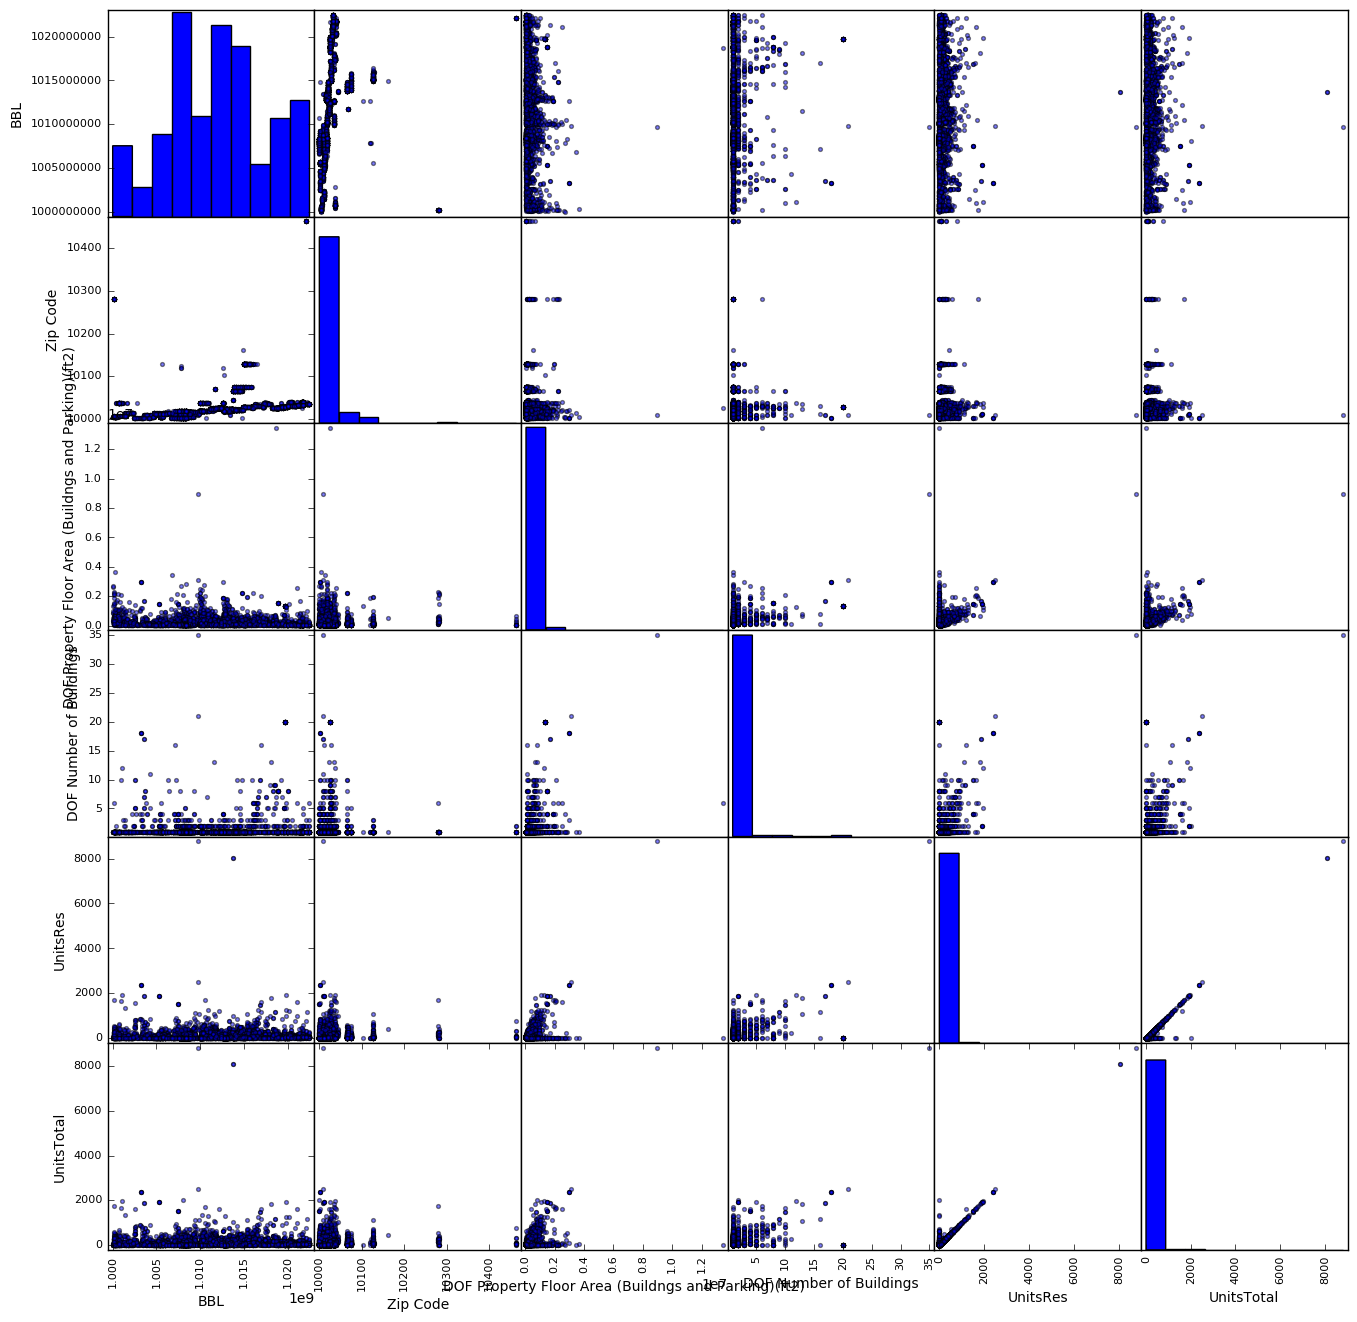

In [21]:
Axes = pd.scatter_matrix(bblnrgdata, s=30, figsize=(16, 16))

[plt.setp(item.yaxis.get_majorticklabels(), 'size', 8) for item in Axes.ravel()];
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 8) for item in Axes.ravel()];
[plt.setp(item.yaxis.get_label(), 'size', 10) for item in Axes.ravel()];
[plt.setp(item.xaxis.get_label(), 'size', 10) for item in Axes.ravel()];

---

### Data Visualisation

In [22]:
bblnrgdata["Energy Total"] = bblnrgdata["Site EUI(kBtu/ft2)"].astype(float) * \
bblnrgdata["Reported Property Floor Area (Building(s)) (ft²)"].astype(float)

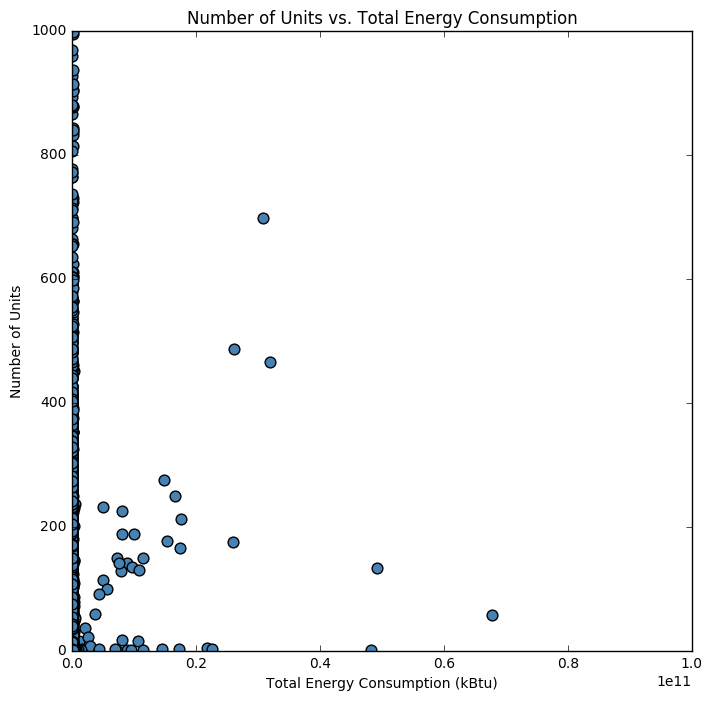

In [23]:
ax = plt.figure(figsize = (8, 8)).add_subplot(111)
plt.scatter(bblnrgdata["Energy Total"], bblnrgdata["UnitsTotal"], c = "#4682B4", s = 60)
ax.set_xlim(0, 1e11); ax.set_ylim(0, 1000)
plt.xlabel("Total Energy Consumption (kBtu)"); plt.ylabel("Number of Units")
plt.title("Number of Units vs. Total Energy Consumption", fontsize = 12)
plt.show()

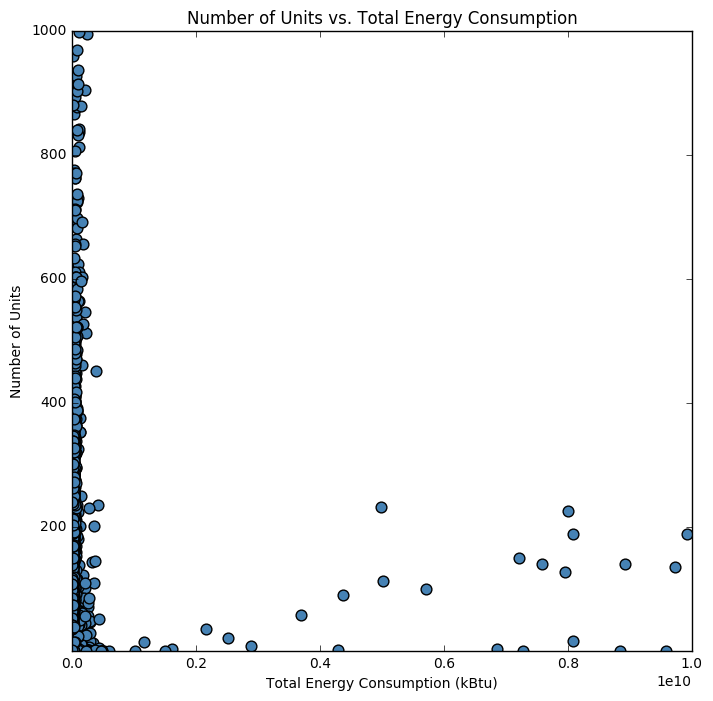

In [24]:
ax = plt.figure(figsize = (8, 8)).add_subplot(111)
plt.scatter(bblnrgdata["Energy Total"], bblnrgdata["UnitsTotal"], c = "#4682B4", s = 60)
ax.set_xlim(1000, 1e10); ax.set_ylim(1,1000)
plt.xlabel("Total Energy Consumption (kBtu)"); plt.ylabel("Number of Units")
plt.title("Number of Units vs. Total Energy Consumption")
plt.show()

In [25]:
bblnrgdata_cut = bblnrgdata.copy()[bblnrgdata["Energy Total"] > 10000]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut["UnitsTotal"] > 10]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut["UnitsTotal"] < 3000]

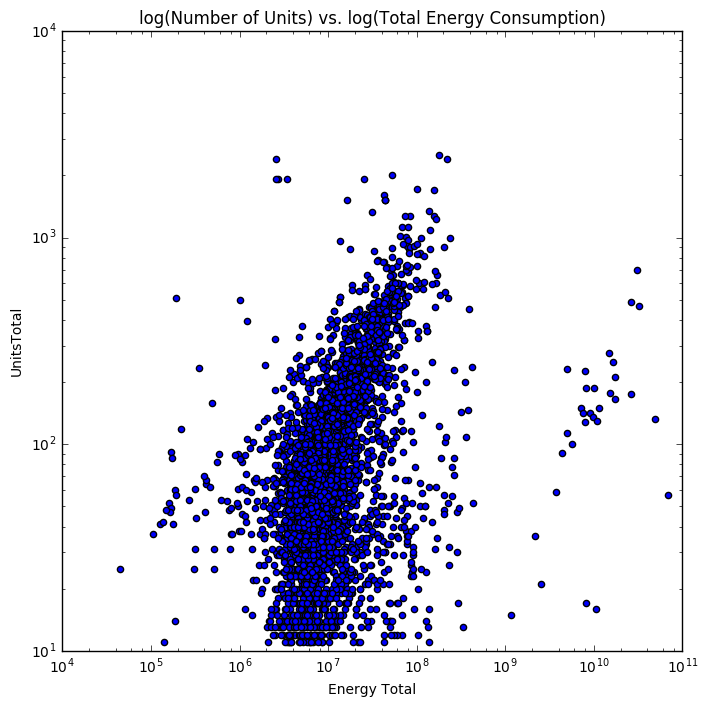

In [26]:
fig = bblnrgdata_cut.plot(x = "Energy Total", y = "UnitsTotal", loglog = True, kind = "scatter",
                         title = "log(Number of Units) vs. log(Total Energy Consumption)", figsize = (8,8))

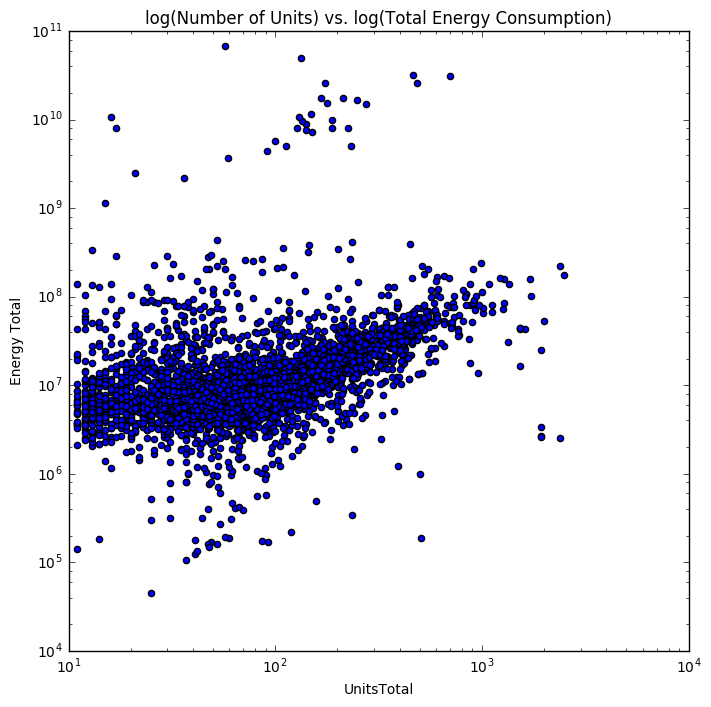

In [27]:
fig = bblnrgdata_cut.plot(y = "Energy Total", x = "UnitsTotal", loglog = True, kind = "scatter",
                         title = "log(Number of Units) vs. log(Total Energy Consumption)", figsize = (8,8))

---

### Regression Model

In [28]:
bblnrgdata_cut["logEnergyTot"] = np.log(bblnrgdata_cut["Energy Total"])
bblnrgdata_cut["logUnitsTotal"] = np.log(bblnrgdata_cut["UnitsTotal"])

In [29]:
lm1 = smf.ols(formula = "logEnergyTot ~ logUnitsTotal", data = bblnrgdata_cut).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           logEnergyTot   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     892.4
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          3.37e-178
Time:                        05:37:36   Log-Likelihood:                -6089.5
No. Observations:                4262   AIC:                         1.218e+04
Df Residuals:                    4260   BIC:                         1.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        14.0248      0.074    188.387

In [30]:
lm2 = smf.ols(formula = "logUnitsTotal ~ logEnergyTot", data = bblnrgdata_cut).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          logUnitsTotal   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     892.4
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          3.37e-178
Time:                        05:37:36   Log-Likelihood:                -5328.0
No. Observations:                4262   AIC:                         1.066e+04
Df Residuals:                    4260   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.2671      0.189     -6.697   

In [31]:
stats.chisquare(lm1.predict(), bblnrgdata_cut["logEnergyTot"])

Power_divergenceResult(statistic=247.34572658992914, pvalue=1.0)

In [32]:
stats.chisquare(lm2.predict(), bblnrgdata_cut["logUnitsTotal"])

Power_divergenceResult(statistic=794.7285443914684, pvalue=1.0)

In [33]:
bblnrgdata_cut["logET2"] = bblnrgdata_cut["logEnergyTot"] * bblnrgdata_cut["logEnergyTot"]

In [34]:
lm3 = smf.ols(formula = "logUnitsTotal ~ logEnergyTot + logET2", data = bblnrgdata_cut).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          logUnitsTotal   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     515.6
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          3.01e-201
Time:                        05:37:36   Log-Likelihood:                -5271.3
No. Observations:                4262   AIC:                         1.055e+04
Df Residuals:                    4259   BIC:                         1.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -11.5242      0.975    -11.821   

In [35]:
y_lm1 = lambda x: lm1.params[0] + lm1.params[1] * x
y_lm2 = lambda x: lm2.params[0] + lm2.params[1] * x
y_lm3 = lambda x: lm3.params[0] + lm3.params[1] * x + lm3.params[2] * x ** 2

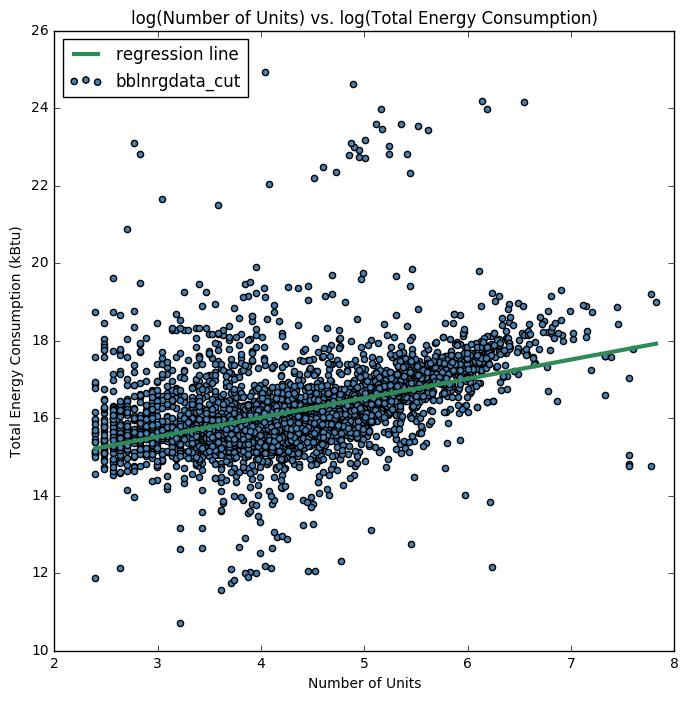

In [36]:
plt.figure(figsize = (8,8))
plt.scatter(bblnrgdata_cut["logUnitsTotal"], bblnrgdata_cut["logEnergyTot"], c = "#4682B4", label = "bblnrgdata_cut")
x_val = np.linspace(min(bblnrgdata_cut["logUnitsTotal"]), max(bblnrgdata_cut["logUnitsTotal"]))
plt.plot(x_val, y_lm1(x_val), label = "regression line", lw = 3, c = "#2E8B57")
plt.xlim(2, 8); plt.ylim(10, 26)
plt.ylabel("Total Energy Consumption (kBtu)"); plt.xlabel("Number of Units")
plt.title("log(Number of Units) vs. log(Total Energy Consumption)")
plt.legend(loc = 2)
plt.show()

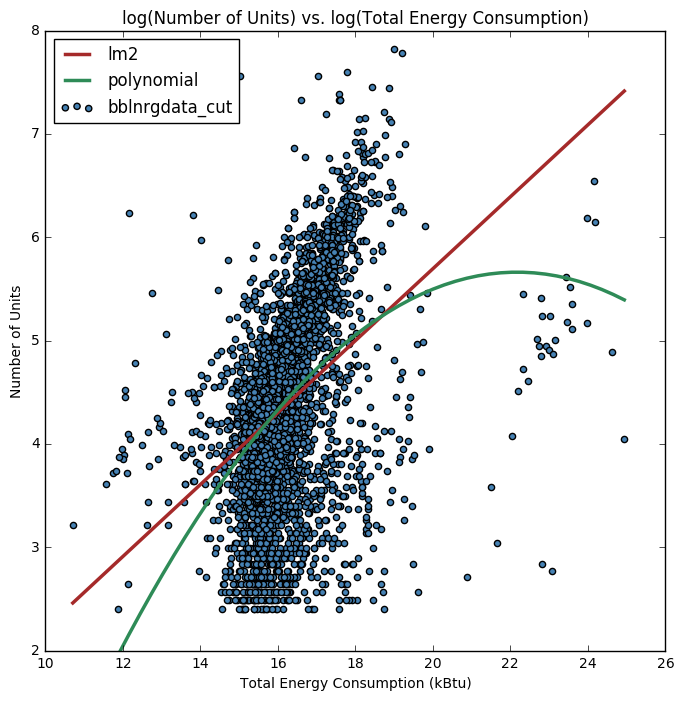

In [37]:
plt.figure(figsize = (8,8))
plt.scatter(bblnrgdata_cut["logEnergyTot"], bblnrgdata_cut["logUnitsTotal"], c = "#4682B4", label = "bblnrgdata_cut")
x_val = np.linspace(min(bblnrgdata_cut["logEnergyTot"]), max(bblnrgdata_cut["logEnergyTot"]))
plt.xlim(10, 26); plt.ylim(2, 8)
plt.plot(x_val, y_lm2(x_val), label = "lm2", c = "#A52A2A", lw = 2.5)
plt.plot(x_val, y_lm3(x_val), label = "polynomial", c = "#2E8B57", lw = 2.5)
plt.xlabel("Total Energy Consumption (kBtu)"); plt.ylabel("Number of Units")
plt.title("log(Number of Units) vs. log(Total Energy Consumption)")
plt.legend(loc = 2)
plt.show()

In [38]:
lm3.compare_lr_test(lm2)

(113.47406615043292, 1.6988889019997683e-26, 1.0)

---